<a href="https://colab.research.google.com/github/Rokuske/Data/blob/main/Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

import random as rd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
from sklearn import tree

In [ ]:
#Подключаемся к гугл диску
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Лабораторные/ИИ/2ЛБ/data_decision_trees.txt', delimiter=',')

In [ ]:
data

array([[4.86, 4.87, 0.  ],
       [4.69, 5.37, 0.  ],
       [3.82, 5.71, 0.  ],
       ...,
       [5.58, 7.17, 1.  ],
       [8.62, 6.02, 1.  ],
       [3.05, 2.11, 1.  ]])

In [ ]:
df = pd.DataFrame(data)
df

,0,1,2
0,4.86,4.87,0.0
1,4.69,5.37,0.0
2,3.82,5.71,0.0
3,2.58,9.88,1.0
4,8.30,5.36,1.0
...,...,...,...
355,4.11,4.80,0.0
356,5.13,3.60,0.0
357,5.58,7.17,1.0
358,8.62,6.02,1.0


In [ ]:
df[2].value_counts()

0.0    180
1.0    180
Name: 2, dtype: int64

<Axes: xlabel='0', ylabel='1'>

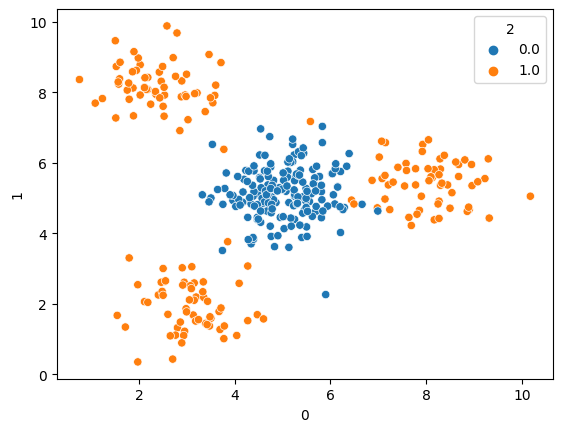

In [ ]:
sns.scatterplot(data = df, x=df[0], y=df[1], hue=df[2])

([<matplotlib.patches.Wedge at 0x7d9f525834f0>,
 [Text(6.735557395310444e-17, 1.1, 'Еденица'),
  Text(-2.0206672185931328e-16, -1.1, 'Ноль')])

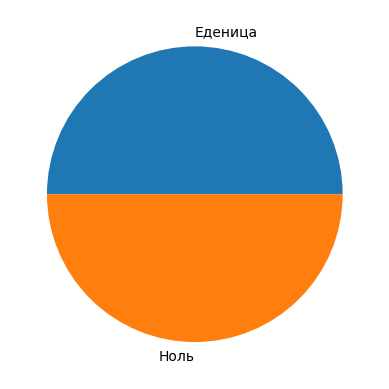

In [ ]:
sizes = [len(df[df[2]==1.0]), len(df[df[2]==0.0])]
labels = 'Еденица', 'Ноль'
ig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

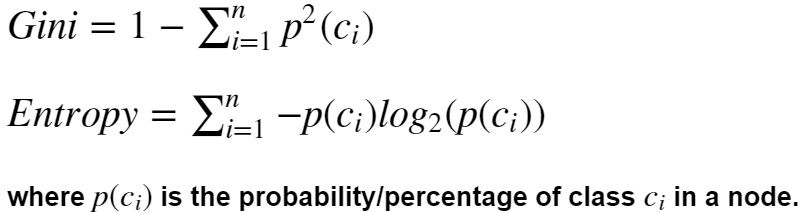

log_loss_09.png


По какому параметру разбиваем
criterion{“gini”, “entropy”, “log_loss”}, default=”gini”

 Индекс Джини показывает как распределились категориальные переменные

 Степень индекса Джини варьируется от 0 до 1,
 Где 0 обозначает, что все элементы связаны с определенным классом, или там существует только один класс.
 Значение индекса Джини, равное 1, означает, что все элементы случайным образом распределены по различным классам, и
 Значение 0,5 обозначает элементы, которые равномерно распределены по некоторым классам.

 Энтропия — в дереве решений это означает однородность.
 Если данные полностью однородны, она равна 0;
 в противном случае, если данные разделены (50-50%), энтропия равна 1

log_loss Логистическая ошибка функции

splitter{“best”, “random”}, default=”best”

 Стратегия, используемая для выбора разделения на каждом узле. Поддерживаемые стратегии - “лучшая”
 для выбора наилучшего разделения и “случайная” для выбора наилучшего случайного разделения.

max_depthint, default=None

 Максимальная гулубина дерева

min_samples_splitint or float, default=2

  Минимум элементов для разбиения

min_samples_leafint or float, default=1

  Минимум элементов в одном листе

random_stateint, RandomState instance or None, default=Non

  Управляет случайностью оценки. Функции всегда случайным образом переставляются при каждом разделении,
  даже если для разделителя установлено значение «лучший». Когда max_features < n_features, алгоритм будет выбирать max_features случайным образом при каждом разбиении,
  прежде чем найти лучшее разделение среди них. Но наилучшее найденное разделение может различаться в зависимости от прогона, даже если max_features=n_features.
  Это тот случай, когда улучшение критерия одинаково для нескольких разбиений и одно разбиение должно быть выбрано случайным образом.
  Чтобы добиться детерминированного поведения во время подгонки, для параметра random_state необходимо зафиксировать целое число.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[[0, 1]], df[2], test_size=0.3, random_state=0)

In [ ]:
X_train

,0,1
281,3.71,1.88
274,7.59,5.78
175,5.49,4.73
295,5.33,5.64
146,5.63,5.81
...,...,...
323,2.55,2.65
192,5.42,5.03
117,3.60,8.20
47,3.19,2.19


In [ ]:
y_test

6      0.0
223    0.0
106    1.0
216    0.0
90     0.0
      ... 
228    0.0
113    1.0
103    0.0
324    0.0
213    1.0
Name: 2, Length: 108, dtype: float64

In [ ]:
y_train

281    1.0
274    1.0
175    0.0
295    0.0
146    0.0
      ... 
323    1.0
192    0.0
117    1.0
47     1.0
172    1.0
Name: 2, Length: 252, dtype: float64

estimator Выбор модели

param_grid: словарь, в котором ключи - это названия параметров модели, а значения - это списки возможных значений этих параметров.

scoring: метрика, по которой оценивается качество модели, по умолчанию выбирает
оценку ошибки исходя из модели для классификации это accuracy_score

cv: схема перекрестной проверки, которая определяет, как разбивать данные на обучающую и тестовую выборки.
Параметр cv в функции GridSearchCV отвечает за схему перекрестной проверки, которая определяет, как разбивать данные на обучающую и тестовую выборки. Этот параметр принимает целочисленное значение, которое определяет количество разбиений данных на обучающую и тестовую выборки. Например, если cv=5, то данные будут разбиты на 5 равных частей, и каждая часть будет использоваться в качестве тестовой выборки один раз, а оставшиеся части будут использоваться в качестве обучающей выборки. Чем больше значение cv, тем более точной будет оценка качества модели, но это также увеличивает время выполнения задачи.




n_jobs: количество ядер процессора, которые будут использоваться для выполнения задачи.

verbose: уровень подробности вывода информации о процессе выполнения задачи.
Параметр verbose в функции GridSearchCV отвечает за уровень подробности вывода информации о процессе выполнения задачи. Он принимает целочисленное значение, которое определяет, как много информации будет выведено на экран. Чем больше значение verbose, тем больше информации будет выведено на экран. Например, verbose=1 означает, что будет выведена информация о каждом шаге выполнения задачи, а verbose=2 означает, что будет выведена информация о каждом шаге выполнения задачи и о каждом параметре. Значение verbose=0 означает, что никакой информации не будет выведено на экран.


Если в функции GridSearchCV установить параметр verbose=True, то это означает, что будет выведена дополнительная информация о процессе выполнения задачи. В частности, будут выведены сообщения о каждом шаге выполнения задачи, включая информацию о текущих значениях параметров и оценках качества модели. Это может быть полезно для отладки и понимания того, как работает функция GridSearchCV. Однако, если пространство параметров модели очень большое, то вывод информации может занять много времени и затруднить понимание процесса выполнения задачи.





return_train_score: определяет, нужно ли возвращать оценки на обучающей выборке.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
              'max_depth' : range(4,20),
              'min_samples_split' : range(4,20),
              'min_samples_leaf' : range(4,20)
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4096 candidates, totalling 20480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'max_depth': range(4, 20),
                         'min_samples_leaf': range(4, 20),
                         'min_samples_split': range(4, 20)},
             verbose=True)

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       random_state=1024)

In [ ]:
clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,random_state=1024)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=4,
                       random_state=1024)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9444444444444444

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9302325581395349

Support количество объектов каждого класса

 Строка "macro avg" в отчете classification_report показывает среднее значение метрик precision, recall и F1-score для всех классов.
Это среднее значение не учитывает размер каждого класса.


Строка "weighted avg" в отчете classification_report показывает среднее значение метрик precision, recall и F1-score для всех классов,
учитывая размер каждого класса. Это среднее значение взвешено по количеству объектов в каждом классе


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95        64
         1.0       0.95      0.91      0.93        44

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.94      0.94      0.94       108



[Text(0.5, 0.9166666666666666, 'x[0] <= 3.785\ngini = 0.497\nsamples = 252\nvalue = [116, 136]'),
 Text(0.2, 0.75, 'x[0] <= 3.445\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 80\nvalue = [0, 80]'),
 Text(0.3, 0.5833333333333334, 'x[1] <= 2.695\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.2, 0.4166666666666667, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4, 0.4166666666666667, 'x[1] <= 6.47\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.3, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.5, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8, 0.75, 'x[0] <= 7.005\ngini = 0.413\nsamples = 158\nvalue = [112, 46]'),
 Text(0.7, 0.5833333333333334, 'x[1] <= 3.335\ngini = 0.111\nsamples = 119\nvalue = [112, 7]'),
 Text(0.6, 0.4166666666666667, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.8, 0.4166666666666667, 'x[0] <= 6.39\ngini = 0.051\nsamples = 114\nvalue = [111, 3]'),
 Text(0.7, 0.

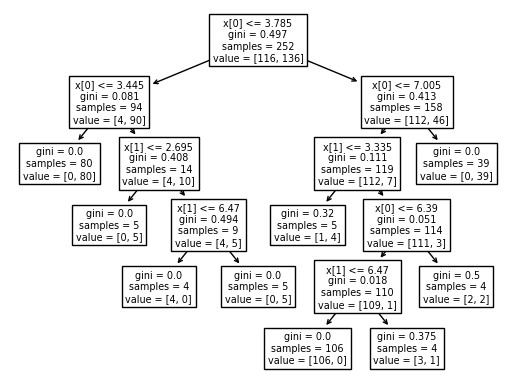

In [ ]:
tree.plot_tree(clf)

In [ ]:
data1 = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Лабораторные/ИИ/2ЛБ/data_random_forests.txt', delimiter=',')

In [ ]:
data1

array([[5.88, 6.2 , 0.  ],
       [5.7 , 3.59, 1.  ],
       [3.42, 4.47, 2.  ],
       ...,
       [6.11, 4.65, 0.  ],
       [7.57, 3.97, 1.  ],
       [3.89, 4.13, 2.  ]])

In [ ]:
df1 = pd.DataFrame(data1)
df1

,0,1,2
0,5.88,6.20,0.0
1,5.70,3.59,1.0
2,3.42,4.47,2.0
3,7.55,7.67,0.0
4,7.16,2.65,1.0
...,...,...,...
895,5.91,1.76,1.0
896,3.47,3.73,2.0
897,6.11,4.65,0.0
898,7.57,3.97,1.0


In [ ]:
df1[2].value_counts()

0.0    300
1.0    300
2.0    300
Name: 2, dtype: int64

([<matplotlib.patches.Wedge at 0x7cd1a120b3d0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'Еденица'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'Ноль'),
  Text(0.5500001486524352, -0.9526278583383436, 'Двойка')])

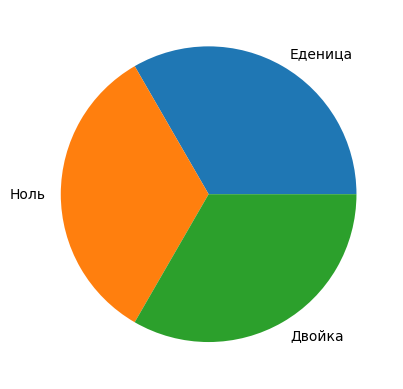

In [ ]:
sizes = [len(df1[df1[2]==1.0]), len(df1[df1[2]==0.0]),len(df1[df1[2]==2.0]) ]
labels = 'Еденица', 'Ноль', 'Двойка'
ig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1[[0, 1]], df1[2], test_size=0.3, random_state=0)

In [ ]:
X_train1

,0,1
76,6.37,1.58
48,5.80,6.06
664,7.64,1.93
263,4.31,3.65
727,5.67,6.94
...,...,...
835,4.88,4.03
192,3.75,8.44
629,1.38,1.64
559,7.58,4.51


In [ ]:
y_train1

76     1.0
48     0.0
664    1.0
263    2.0
727    1.0
      ... 
835    1.0
192    0.0
629    2.0
559    1.0
684    0.0
Name: 2, Length: 630, dtype: float64

Метод случайного леса (Random Forest Classifier) - это алгоритм машинного обучения, который используется для задач классификации. Он объединяет несколько решающих деревьев для получения более точного и стабильного прогноза. Алгоритм работает следующим образом:
На этапе обучения алгоритм строит множество решающих деревьев, где каждое дерево обучается на случайном подмножестве данных и признаков.
В процессе обучения алгоритм применяет технику бэггинга (bootstrap aggregating) к деревьям. Для каждого дерева алгоритм выбирает случайную выборку с повторениями из обучающего набора данных и обучает дерево на этой выборке.
Выходом метода случайного леса является класс, выбранный большинством деревьев для задач классификации, и среднее или средневзвешенное предсказание для задач регрессии.
Алгоритм корректирует проблему переобучения решающих деревьев на обучающем наборе данных и, как правило, превосходит решающие деревья.
Гиперпараметры метода случайного леса включают размер узла, количество деревьев и количество признаков, выбранных для обучения.
Метод случайного леса широко используется в различных областях, таких как здравоохранение и электронная коммерция, для задач, таких как идентификация

Параметр n_estimators - это гиперпараметр, который отвечает за количество деревьев в ансамбле случайного леса или метода ExtraTreesClassifier. Чем больше деревьев, тем более точным и стабильным будет прогноз, но при этом увеличивается время обучения и риск переобучения. Значение n_estimators можно настраивать в зависимости от размера обучающей выборки и сложности задачи. Обычно выбирают значения от 50 до 500, но в некоторых случаях может потребоваться большее количество деревьев.

Метод голосования решающие деревья и агрегация

Экстра дерево может мгнорировать фичи(Проверить)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param_grid = {
              'n_estimators' : range(4,30),
              'max_depth' : range(4,10)
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search= GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train1, y_train1)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 10),
                         'n_estimators': range(4, 30)},
             verbose=True)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=24)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf1 = RandomForestClassifier(n_estimators = 24,max_depth = 6, random_state=1024)

In [ ]:
clf1.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=6, n_estimators=24, random_state=1024)

In [ ]:
y_pred1 = clf1.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80        86
         1.0       0.80      0.76      0.78        97
         2.0       0.80      0.83      0.81        87

    accuracy                           0.80       270
   macro avg       0.80      0.80      0.80       270
weighted avg       0.80      0.80      0.80       270



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y, title=''):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Specify the title
    plt.title(title)

    # Choose a color scheme for the plot
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

In [ ]:
data1

array([[5.88, 6.2 , 0.  ],
       [5.7 , 3.59, 1.  ],
       [3.42, 4.47, 2.  ],
       ...,
       [6.11, 4.65, 0.  ],
       [7.57, 3.97, 1.  ],
       [3.89, 4.13, 2.  ]])

In [ ]:
NPX = np.array(X_test1)

In [ ]:
X_test1

,0,1
492,4.78,4.81
141,5.14,5.34
409,5.36,2.86
31,10.08,2.87
570,3.50,8.75
...,...,...
49,2.96,5.27
440,3.96,5.02
333,6.88,4.04
271,6.51,2.80


In [ ]:
NPX

In [ ]:
NPY = np.array(y_test1)

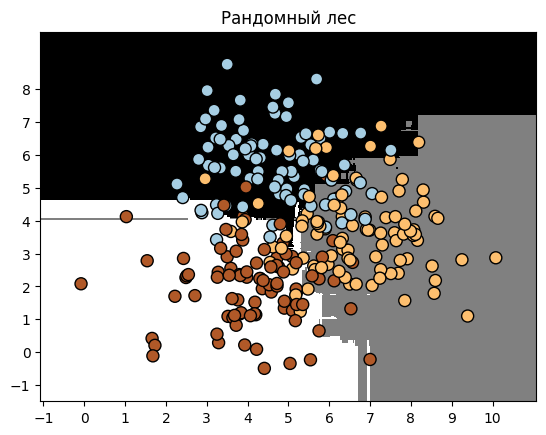

In [ ]:
visualize_classifier(clf1, NPX, NPY, "Рандомный лес")

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
efc = ExtraTreesClassifier()
param_grid = {
              'n_estimators' : range(4,30),
              'max_depth' : range(4,10)
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search= GridSearchCV(estimator=efc, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train1, y_train1)


Fitting 5 folds for each of 156 candidates, totalling 780 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': range(4, 10),
                         'n_estimators': range(4, 30)},
             verbose=True)

In [ ]:
grid_search.best_estimator_

ExtraTreesClassifier(max_depth=8, n_estimators=10)

Метод ExtraTreesClassifier - это алгоритм машинного обучения, который используется для задач классификации. Он является методом ансамбля, который объединяет несколько решающих деревьев для получения более точного и стабильного прогноза. Алгоритм работает следующим образом:
На этапе обучения алгоритм строит множество решающих деревьев, где каждое дерево обучается на случайном подмножестве данных и признаков.
В процессе обучения алгоритм применяет технику бэггинга (bootstrap aggregating) к деревьям. Для каждого дерева алгоритм выбирает случайную выборку с повторениями из обучающего набора данных и обучает дерево на этой выборке.
В отличие от метода случайного леса, ExtraTreesClassifier выбирает случайные пороги для каждого признака вместо определения наилучшего порога.
Выходом метода ExtraTreesClassifier является класс, выбранный большинством деревьев для задач классификации, и среднее или средневзвешенное предсказание для задач регрессии.
Гиперпараметры метода ExtraTreesClassifier включают размер узла, количество деревьев и количество признаков, выбранных для обучения.

ExtraTreesClassifier и Random Forest Classifier - это два очень похожих метода ансамбля, которые используют несколько решающих деревьев для получения более точного и стабильного прогноза. Однако у них есть несколько отличий:
ExtraTreesClassifier выбирает случайные пороги для каждого признака вместо определения наилучшего порога, как это делает Random Forest Classifier.
ExtraTreesClassifier выбирает случайный сплит для разделения родительского узла на два случайных дочерних узла, в то время как Random Forest Classifier выбирает оптимальный сплит.
ExtraTreesClassifier быстрее, чем Random Forest Classifier, потому что он выбирает случайные пороги и сплиты вместо оптимальных.
Random Forest Classifier более компактный, чем ExtraTreesClassifier, но может занимать больше времени на обучение.

Пороги - это значения, используемые для разделения данных на классы в задачах бинарной классификации. При конвертации вещественного ответа алгоритма (как правило, вероятности принадлежности к классу) в бинарную метку, необходимо выбрать порог, при котором 0 становится 1. Естественным и близким кажется порог, равный 0.5, но он не всегда оказывается оптимальным, например, при отсутствии баланса классов. Пороги также используются для определения, к какому классу отнести образец в задачах классификации.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
clf2 = ExtraTreesClassifier(max_depth=8, n_estimators=10, random_state=1024)

In [ ]:
clf2.fit(X_train1, y_train1)

ExtraTreesClassifier(max_depth=8, n_estimators=10, random_state=1024)

In [ ]:
y_pred2 = clf2.predict(X_test1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_pred2))

              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78        86
         1.0       0.77      0.74      0.76        97
         2.0       0.79      0.85      0.82        87

    accuracy                           0.79       270
   macro avg       0.79      0.79      0.79       270
weighted avg       0.79      0.79      0.78       270



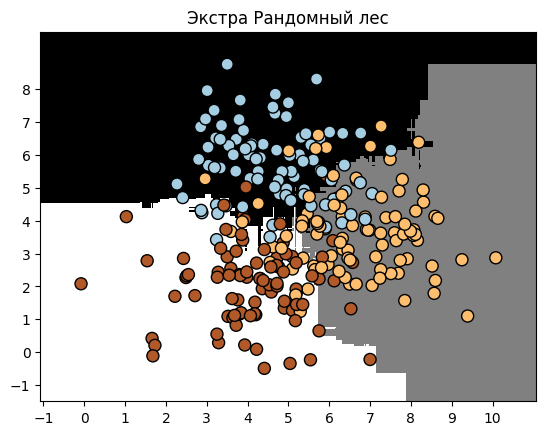

In [ ]:
visualize_classifier(clf2, NPX, NPY, "Экстра Рандомный лес")

In [ ]:
data3 = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Лабораторные/ИИ/2ЛБ/data_imbalance.txt', delimiter=',')

In [ ]:
df3 = pd.DataFrame(data3)
df3

,0,1,2
0,5.66,6.77,1.0
1,4.40,5.05,0.0
2,3.52,4.73,1.0
3,6.77,3.77,1.0
4,5.91,2.09,1.0
...,...,...,...
1495,4.86,6.28,0.0
1496,2.23,3.31,1.0
1497,5.98,4.06,1.0
1498,5.03,2.07,1.0


In [ ]:
df3[2].value_counts()

1.0    1250
0.0     250
Name: 2, dtype: int64

([<matplotlib.patches.Wedge at 0x7d9f1626ef20>,
 [Text(-0.9526279098330698, 0.5500000594609756, 'Еденица'),
  Text(0.9526278840857079, -0.5500001040567061, 'Ноль')])

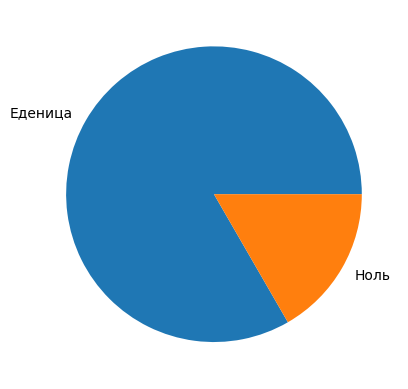

In [ ]:
sizes = [len(df3[df3[2]==1.0]), len(df3[df3[2]==0.0])]
labels = 'Еденица', 'Ноль'
ig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3[[0, 1]], df3[2], test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf3 = ExtraTreesClassifier(max_depth=8, n_estimators=10, random_state=1024)

In [ ]:
clf3.fit(X_train3, y_train3)

ExtraTreesClassifier(max_depth=8, n_estimators=10, random_state=1024)

In [ ]:
y_pred3 = clf3.predict(X_test3)

Precision (точность) - отношение TP к TP + FP. Это доля объектов, названными классификатором положительными и при этом действительно являющимися положительными. Возвращаясь к нашему объяснению про кучу песка из начала, оно измеряет, насколько чистый песок стал после просеивания (TP - просеянный песок, FP - мусор). Но стоит помнить, что песок попал не весь, потому что комки песка не смогли попасть через сетку. Или же то, насколько Вася был честным, когда кричал о нападении Волка.

Recall (Полнота) - отношение TP к TP + FN. Это то, какую долю объектов положительного класса из всех объектов положительного класса нашёл алгоритм. Оно же измеряет, насколько весь песок попал в кучу, то есть комки песка тоже должны попасть, но загвоздка в том, что мусор тоже может попасть в нашу кучу. (TP - просеянный песок, FN - непросеянный песок). Или же то, насколько внимательным был Вася и замечал нападение Волка.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

         0.0       0.67      0.41      0.51        76
         1.0       0.89      0.96      0.92       374

    accuracy                           0.87       450
   macro avg       0.78      0.68      0.72       450
weighted avg       0.85      0.87      0.85       450



In [ ]:
NPX3 = np.array(X_test3)
NPY3 = np.array(y_test3)

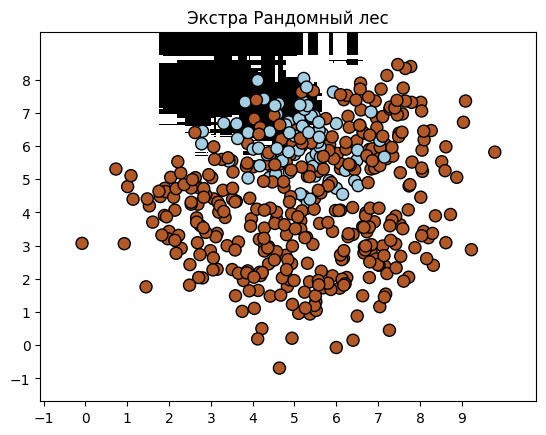

In [ ]:
visualize_classifier(clf3, NPX3, NPY3, "Экстра Рандомный лес")

Параметр class_weight - это гиперпараметр, который используется для управления весами классов в задачах классификации. Он позволяет учитывать дисбаланс классов в обучающей выборке, что может улучшить качество модели. Если значение параметра установлено на None, то все классы имеют одинаковый вес. Если значение параметра установлено на balanced, то веса классов вычисляются автоматически на основе частоты их появления в обучающей выборке. Если значение параметра установлено на пользовательский словарь, то веса классов могут быть заданы вручную.

При дисбалансе выборки в задачах классификации, веса классов могут быть использованы для учета этого дисбаланса. Веса классов позволяют учитывать разницу в количестве объектов в каждом классе при обучении модели. В зависимости от выбранного метода и библиотеки машинного обучения, веса классов могут быть заданы автоматически на основе частоты их появления в обучающей выборке или вручную.
При использовании весов классов, веса могут быть распределены следующим образом:
Классы с меньшим количеством объектов могут быть назначены большим весом, чтобы увеличить их важность при обучении модели.
Классы с большим количеством объектов могут быть назначены меньшим весом, чтобы уменьшить их влияние на обучение модели.

In [ ]:
clf4 = ExtraTreesClassifier(max_depth=8, n_estimators=10, random_state=1024, class_weight='balanced')

In [ ]:
clf4.fit(X_train3, y_train3)

ExtraTreesClassifier(class_weight='balanced', max_depth=8, n_estimators=10,
                     random_state=1024)

In [ ]:
y_pred4 = clf4.predict(X_test3)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test3, y_pred4))

              precision    recall  f1-score   support

         0.0       0.44      0.83      0.58        76
         1.0       0.96      0.79      0.87       374

    accuracy                           0.80       450
   macro avg       0.70      0.81      0.72       450
weighted avg       0.87      0.80      0.82       450



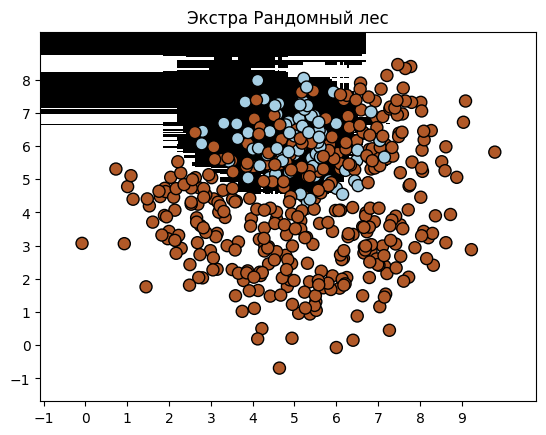

In [ ]:
visualize_classifier(clf4, NPX3, NPY3, "Экстра Рандомный лес")

In [ ]:
data5 = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Лабораторные/ИИ/2ЛБ/data_random_forests.txt', delimiter=',')

In [ ]:
df5 = pd.DataFrame(data5)
df5

,0,1,2
0,5.88,6.20,0.0
1,5.70,3.59,1.0
2,3.42,4.47,2.0
3,7.55,7.67,0.0
4,7.16,2.65,1.0
...,...,...,...
895,5.91,1.76,1.0
896,3.47,3.73,2.0
897,6.11,4.65,0.0
898,7.57,3.97,1.0


In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5[[0, 1]], df5[2], test_size=0.3, random_state=0)

n_estimators: количество деревьев в лесу. По умолчанию установлено значение 100.


criterion: функция для измерения качества разделения. Доступны две функции: "gini" для индекса Джини и "entropy" для энтропийного коэффициента. По умолчанию используется "gini".


max_depth: максимальная глубина каждого дерева. По умолчанию установлено значение None, что означает, что деревья будут расширяться до тех пор, пока все листья не будут чистыми или пока не будет достигнуто минимальное количество выборок для разделения.


min_samples_split: минимальное количество выборок, необходимых для разделения внутреннего узла. По умолчанию установлено значение 2.


min_samples_leaf: минимальное количество выборок, необходимых для листового узла. По умолчанию установлено значение 1.


max_features: количество признаков, которые следует рассмотреть при поиске лучшего разделения. По умолчанию установлено значение "auto", что означает, что алгоритм будет рассматривать sqrt(n_features) признаков на каждом разделении.

class_weight: веса классов, используемые для учета дисбаланса классов в обучающей выборке. По умолчанию установлено значение None, что означает, что все классы имеют одинаковый вес.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
param_grid = {
              'n_estimators' : range(4,10),
              'max_depth' : range(4,10)
             }
tree_clas = RandomForestClassifier(random_state=1024)
grid_search= GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=True, scoring='precision_weighted')
grid_search.fit(X_train5, y_train5)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(4, 10),
                         'n_estimators': range(4, 10)},
             scoring='precision_weighted', verbose=True)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=21)

In [ ]:
clf5 = RandomForestClassifier(max_depth=8, n_estimators=21)
clf5.fit(X_train5, y_train5)

RandomForestClassifier(max_depth=8, n_estimators=21)

In [ ]:
y_pred5 = clf5.predict(X_test5)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'max_depth': 4, 'n_estimators': 4}",0.862690
1,"{'max_depth': 4, 'n_estimators': 5}",0.864382
2,"{'max_depth': 4, 'n_estimators': 6}",0.859131
3,"{'max_depth': 4, 'n_estimators': 7}",0.865550
4,"{'max_depth': 4, 'n_estimators': 8}",0.847956
5,"{'max_depth': 4, 'n_estimators': 9}",0.854693
6,"{'max_depth': 5, 'n_estimators': 4}",0.871294
7,"{'max_depth': 5, 'n_estimators': 5}",0.865746
8,"{'max_depth': 5, 'n_estimators': 6}",0.853516
9,"{'max_depth': 5, 'n_estimators': 7}",0.855723


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test5, y_pred5))

              precision    recall  f1-score   support

         0.0       0.78      0.80      0.79        86
         1.0       0.80      0.75      0.78        97
         2.0       0.79      0.83      0.81        87

    accuracy                           0.79       270
   macro avg       0.79      0.79      0.79       270
weighted avg       0.79      0.79      0.79       270

